=== Aperçu des données ===
           name                       full_name birth_date  age  height_cm  \
0      L. Messi  Lionel Andrés Messi Cuccittini  6/24/1987   31     170.18   
1    C. Eriksen    Christian  Dannemann Eriksen  2/14/1992   27     154.94   
2      P. Pogba                      Paul Pogba  3/15/1993   25     190.50   
3    L. Insigne                 Lorenzo Insigne   6/4/1991   27     162.56   
4  K. Koulibaly               Kalidou Koulibaly  6/20/1991   27     187.96   

   weight_kgs  positions nationality  overall_rating  potential  ...  \
0        72.1   CF,RW,ST   Argentina              94         94  ...   
1        76.2  CAM,RM,CM     Denmark              88         89  ...   
2        83.9     CM,CAM      France              88         91  ...   
3        59.0      LW,ST       Italy              88         88  ...   
4        88.9         CB     Senegal              88         91  ...   

   long_shots  aggression interceptions  positioning  vision  penalties

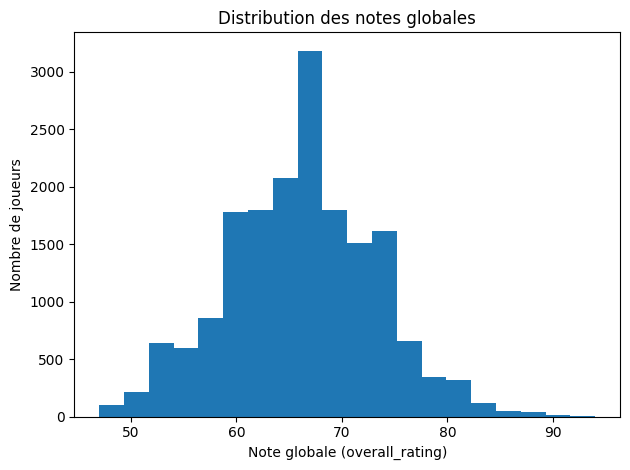

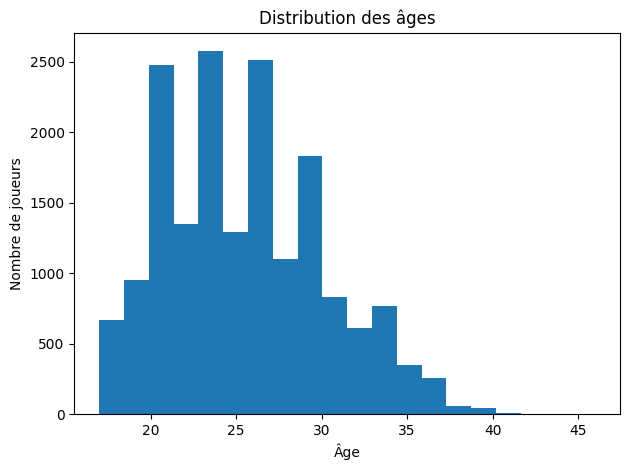

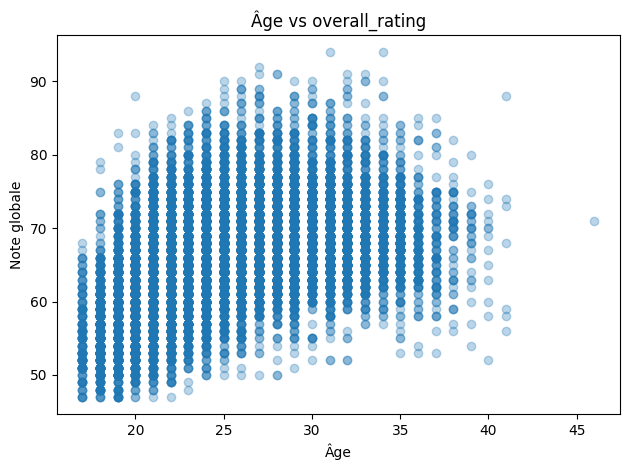

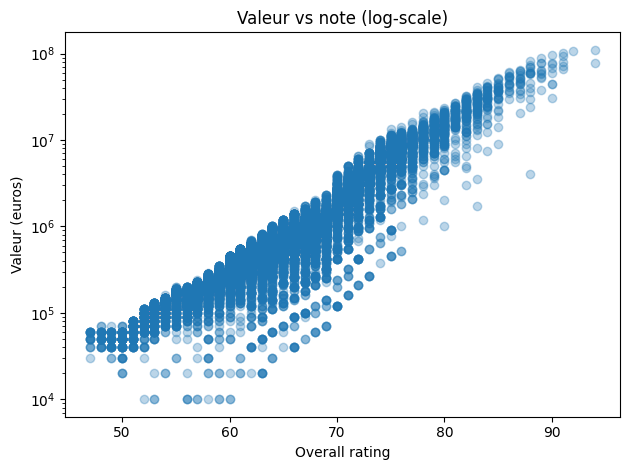

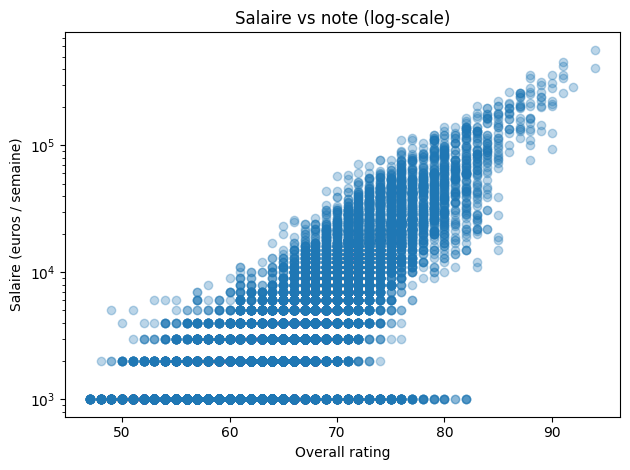


=== Matrice de corrélation ===
                     age  overall_rating  potential  value_euro  wage_euro  \
age             1.000000        0.464441  -0.258674    0.082360   0.153378   
overall_rating  0.464441        1.000000   0.646276    0.630928   0.577478   
potential      -0.258674        0.646276   1.000000    0.576341   0.484318   
value_euro      0.082360        0.630928   0.576341    1.000000   0.856466   
wage_euro       0.153378        0.577478   0.484318    0.856466   1.000000   
finishing       0.077491        0.343103   0.246704    0.261003   0.224925   
dribbling       0.019795        0.379939   0.314748    0.273006   0.241829   
short_passing   0.140952        0.508115   0.367346    0.329467   0.302847   
acceleration   -0.147862        0.205280   0.238832    0.174608   0.130694   
sprint_speed   -0.140077        0.219187   0.240918    0.176703   0.135345   
stamina         0.109492        0.370494   0.197739    0.216471   0.185266   
strength        0.343408        

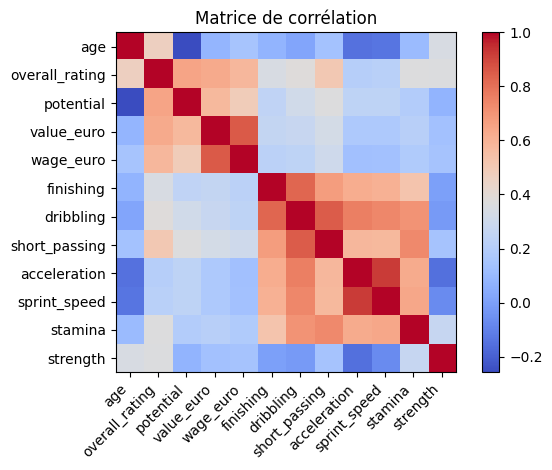


=== Top 10 positions ===
positions
CB        2207
GK        2024
ST        1725
CM         753
CDM,CM     700
LB         662
CM,CDM     625
RB         595
CDM        308
CB,RB      264
Name: count, dtype: int64

=== Top 10 nationalités ===
nationality
England        1655
Germany        1199
Spain          1070
France          924
Argentina       904
Brazil          831
Italy           655
Colombia        623
Japan           465
Netherlands     441
Name: count, dtype: int64


In [1]:
# analyze_data.py
import pandas as pd
import os, glob
import matplotlib.pyplot as plt

DATA_PATH = "../data/fifa_players.csv"

df = pd.read_csv(DATA_PATH, low_memory=False)



print("=== Aperçu des données ===")
print(df.head(), "\n")

print("=== Infos colonnes ===")
print(df.info(), "\n")

# --- FILTRER MANUELLEMENT LES COLONNES NUMÉRIQUES ---
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

print("=== Statistiques numériques ===")
print(df[numeric_cols].describe(), "\n")

# Colonnes principales
col_overall = "overall_rating"
col_age = "age"
col_potential = "potential"
col_value = "value_euro"
col_wage = "wage_euro"

required_cols = [col_overall, col_age, col_potential, col_value, col_wage]
for c in required_cols:
    if c not in df.columns:
        raise ValueError(f"La colonne '{c}' est introuvable dans le CSV.")

df_clean = df.dropna(subset=required_cols)

# 2) Distribution overall
plt.figure()
plt.hist(df_clean[col_overall], bins=20)
plt.xlabel("Note globale (overall_rating)")
plt.ylabel("Nombre de joueurs")
plt.title("Distribution des notes globales")
plt.tight_layout()
plt.show()


# 3) Âge
plt.figure()
plt.hist(df_clean[col_age], bins=20)
plt.xlabel("Âge")
plt.ylabel("Nombre de joueurs")
plt.title("Distribution des âges")
plt.tight_layout()
plt.show()


# 4) Âge vs note
plt.figure()
plt.scatter(df_clean[col_age], df_clean[col_overall], alpha=0.3)
plt.xlabel("Âge")
plt.ylabel("Note globale")
plt.title("Âge vs overall_rating")
plt.tight_layout()
plt.show()


# 5) Valeur vs note
plt.figure()
plt.scatter(df_clean[col_overall], df_clean[col_value], alpha=0.3)
plt.xlabel("Overall rating")
plt.ylabel("Valeur (euros)")
plt.yscale("log")
plt.title("Valeur vs note (log-scale)")
plt.tight_layout()
plt.show()


# 6) Salaire vs note
plt.figure()
plt.scatter(df_clean[col_overall], df_clean[col_wage], alpha=0.3)
plt.xlabel("Overall rating")
plt.ylabel("Salaire (euros / semaine)")
plt.yscale("log")
plt.title("Salaire vs note (log-scale)")
plt.tight_layout()
plt.show()


# 7) Matrice de corrélation (sélection de colonnes)
corr_cols = [
    "age",
    "overall_rating",
    "potential",
    "value_euro",
    "wage_euro",
    "finishing",
    "dribbling",
    "short_passing",
    "acceleration",
    "sprint_speed",
    "stamina",
    "strength",
]
corr_cols = [c for c in corr_cols if c in df_clean.columns]

corr = df_clean[corr_cols].corr()
print("\n=== Matrice de corrélation ===")
print(corr)

plt.figure()
plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
plt.colorbar()
plt.xticks(range(len(corr_cols)), corr_cols, rotation=45, ha="right")
plt.yticks(range(len(corr_cols)), corr_cols)
plt.title("Matrice de corrélation")
plt.tight_layout()
plt.show()


# 8) Statistiques sur positions et nationalités
if "positions" in df_clean.columns:
    print("\n=== Top 10 positions ===")
    print(df_clean["positions"].value_counts().head(10))

if "nationality" in df_clean.columns:
    print("\n=== Top 10 nationalités ===")
    print(df_clean["nationality"].value_counts().head(10))

